In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import matplotlib.colors as mcolors
import numpy as np
import collections
import seaborn as sns

In [3]:
#reading indidual year data

_2008 = pd.read_csv('2008.csv')
_2009 = pd.read_csv('2009.csv')
_2010 = pd.read_csv('2010.csv')
_2011 = pd.read_csv('2011.csv')
_2012 = pd.read_csv('2012.csv')
_2013 = pd.read_csv('2013.csv')
_2014 = pd.read_csv('2014.csv')
_2015 = pd.read_csv('2015.csv')
_2016 = pd.read_csv('2016.csv')
_2017 = pd.read_csv('2017.csv')
_2018 = pd.read_csv('2018.csv')
_2019 = pd.read_csv('2019.csv')
_2020_2021 = pd.read_csv('2020-2021.csv')

In [7]:
#compliling data
data = _2008.append(_2009).append(_2010).append(_2011).append(_2012).append(_2013).append(_2014).append(_2015).append(_2016).append(_2017).append(_2018).append(_2019).append(_2020_2021)

In [8]:
data.to_csv('pitch_data_2008_2021')

In [346]:
pd.read_csv('pitch_data_2008_2021')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,24,44,88,89,93) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,3
0,0,CH,9/30/08,82.9,-0.16,5.70,"Danks, John",346857,433579,NaN,...,0,1,0,1,NaN,NaN,NaN,0.000,0.042,NaN
1,1,FF,9/30/08,92.3,0.07,5.87,"Danks, John",346857,433579,NaN,...,0,1,0,1,NaN,NaN,NaN,0.000,-0.049,NaN
2,2,FF,9/30/08,91.6,0.11,5.72,"Danks, John",430593,433579,NaN,...,0,1,0,1,NaN,NaN,NaN,0.000,-0.047,NaN
3,3,FF,9/30/08,91.8,0.24,5.80,"Danks, John",430593,433579,NaN,...,0,1,0,1,NaN,NaN,NaN,0.000,-0.040,NaN
4,4,FF,9/30/08,91.1,0.26,5.85,"Danks, John",430593,433579,NaN,...,0,1,0,1,NaN,NaN,NaN,0.000,0.045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519995,39995,NaN,4/15/21,93.1,1.68,6.25,"Urías, Julio",658069,628711,NaN,...,1,0,1,0,Infield shift,Standard,146.0,0.000,0.041,FF
519996,39996,NaN,4/15/21,93.5,-1.27,6.29,"Newberry, Jake",642133,623470,NaN,...,2,7,2,7,Infield shift,Standard,199.0,0.000,0.056,FF
519997,39997,NaN,4/15/21,81.2,1.30,6.21,"Avilán, Luis",452678,501593,NaN,...,10,4,10,4,Standard,Standard,129.0,0.000,0.023,CH
519998,39998,NaN,4/15/21,87.3,2.92,5.68,"Kay, Anthony",467793,641743,NaN,...,0,1,1,0,Standard,Standard,127.0,-0.049,-0.041,CH


In [347]:
#grabbing columns we want
pitch_data = data[['pitch_name', 'plate_x', 'plate_z', 'description', 'stand']]

In [348]:
#grabbing only umpire called pitches, no swings
pitch_data = pitch_data[pitch_data['description'].isin(['called_strike', 'ball', 'blocked_ball'])]

In [349]:
#blocked balls are just balls
pitch_data['description'].replace('blocked_ball', 'ball', inplace = True)

In [357]:
pitch_data.head(10)

,pitch_name,plate_x,plate_z,description,stand
0,Changeup,-0.87,-0.33,ball,R
1,4-Seam Fastball,-0.26,2.67,called_strike,R
2,4-Seam Fastball,0.55,2.10,called_strike,R
3,4-Seam Fastball,0.70,3.03,called_strike,R
4,4-Seam Fastball,1.24,3.06,ball,R
5,4-Seam Fastball,0.94,2.44,ball,R
6,4-Seam Fastball,-0.56,2.26,called_strike,L
7,Changeup,-1.86,0.95,ball,R
8,2-Seam Fastball,-1.74,3.06,ball,L
9,4-Seam Fastball,-0.12,2.94,called_strike,R


In [382]:
pitch_data.loc[pitch_data.stand == 'L', 'plate_x'] = pitch_data.loc[pitch_data.stand == 'L', 'plate_x'] * -1
pitch_data.head(10)

,pitch_name,plate_x,plate_z,description,stand
0,Changeup,-0.87,-0.33,ball,R
1,4-Seam Fastball,-0.26,2.67,called_strike,R
2,4-Seam Fastball,0.55,2.10,called_strike,R
3,4-Seam Fastball,0.70,3.03,called_strike,R
4,4-Seam Fastball,1.24,3.06,ball,R
5,4-Seam Fastball,0.94,2.44,ball,R
6,4-Seam Fastball,0.56,2.26,called_strike,L
7,Changeup,-1.86,0.95,ball,R
8,2-Seam Fastball,1.74,3.06,ball,L
9,4-Seam Fastball,-0.12,2.94,called_strike,R


In [475]:
pitch_data.pitch_name.unique()

array(['Changeup', '4-Seam Fastball', '2-Seam Fastball', 'Cutter',
       'Curveball', 'Slider', 'Sinker', 'Split-Finger', 'Knuckleball',
       'Knuckle Curve', 'Eephus', 'Forkball', 'Screwball'], dtype=object)

In [502]:
pitch_data[pitch_data['plate_z'] > 3.5]

,pitch_name,plate_x,plate_z,description,stand
11,4-Seam Fastball,-0.63,3.68,ball,L
19,2-Seam Fastball,0.75,3.55,called_strike,L
35,2-Seam Fastball,-0.27,4.09,ball,R
38,Cutter,1.43,3.84,ball,L
53,4-Seam Fastball,0.06,4.34,ball,R
...,...,...,...,...,...
39929,4-Seam Fastball,0.51,4.07,ball,R
39934,4-Seam Fastball,0.54,3.93,ball,R
39938,Curveball,0.30,3.52,ball,R
39959,4-Seam Fastball,0.01,4.48,ball,L


In [478]:
split_finger = pitch_data[pitch_data['pitch_name'] == 'Split-Finger']

In [479]:
split_finger

,pitch_name,plate_x,plate_z,description,stand
154,Split-Finger,-2.02,3.53,ball,R
158,Split-Finger,0.79,0.74,ball,R
168,Split-Finger,1.83,-0.28,ball,R
171,Split-Finger,-0.32,2.23,ball,L
174,Split-Finger,0.93,1.81,ball,L
...,...,...,...,...,...
39226,Split-Finger,-0.52,0.74,ball,R
39443,Split-Finger,0.01,3.32,called_strike,R
39782,Split-Finger,0.98,1.79,ball,R
39838,Split-Finger,-0.10,2.52,called_strike,R


In [504]:
fastball = pitch_data[pitch_data['pitch_name'] == '4-Seam Fastball']
fastball

,pitch_name,plate_x,plate_z,description,stand
1,4-Seam Fastball,-0.26,2.67,called_strike,R
2,4-Seam Fastball,0.55,2.10,called_strike,R
3,4-Seam Fastball,0.70,3.03,called_strike,R
4,4-Seam Fastball,1.24,3.06,ball,R
5,4-Seam Fastball,0.94,2.44,ball,R
...,...,...,...,...,...
39989,4-Seam Fastball,-0.16,3.23,called_strike,L
39992,4-Seam Fastball,-0.02,1.40,ball,R
39994,4-Seam Fastball,-1.10,1.94,ball,R
39995,4-Seam Fastball,2.28,2.90,ball,R


,pitch_name,plate_x,plate_z,description,stand
11,4-Seam Fastball,-0.63,3.68,ball,L
53,4-Seam Fastball,0.06,4.34,ball,R
65,4-Seam Fastball,0.79,4.34,ball,R
66,4-Seam Fastball,0.25,4.64,ball,R
93,4-Seam Fastball,-0.06,3.76,ball,L
...,...,...,...,...,...
39906,4-Seam Fastball,-0.76,3.65,ball,R
39929,4-Seam Fastball,0.51,4.07,ball,R
39934,4-Seam Fastball,0.54,3.93,ball,R
39959,4-Seam Fastball,0.01,4.48,ball,L


In [329]:
#grabbing changeups
changeups = pitch_data[pitch_data['pitch_name'] == 'Changeup']

In [158]:
changeups

,pitch_name,plate_x,plate_z,description
0,Changeup,-0.87,-0.33,ball
7,Changeup,-1.86,0.95,ball
18,Changeup,0.76,3.04,called_strike
58,Changeup,1.88,3.47,ball
60,Changeup,-0.73,1.85,ball
...,...,...,...,...
39920,Changeup,-2.31,3.44,ball
39922,Changeup,0.02,1.12,ball
39940,Changeup,0.32,0.16,ball
39997,Changeup,-0.28,-0.11,ball


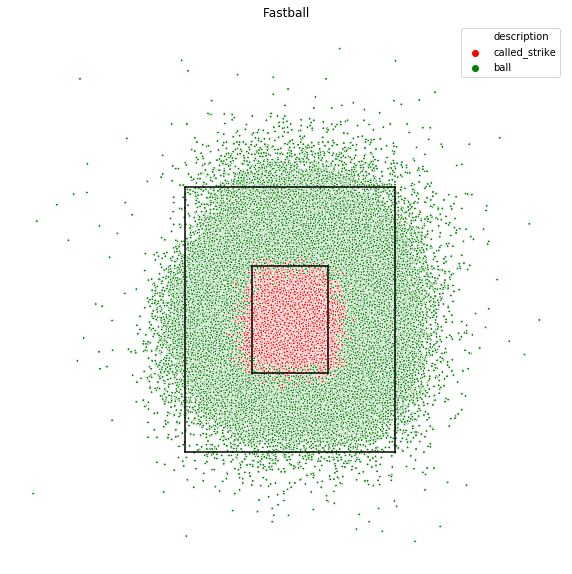

In [483]:
fig, ax = plt.subplots(figsize =(10,10))

# Outer Zone (To gage length from strikezone)

plt.plot([-2,-2],[0,5], color="black")     
plt.plot([2,2],[0,5], color="black")
plt.plot([-2,2],[0,0], color="black")
plt.plot([-2,2],[5,5], color="black")

#Strikezone

plt.plot([-.725,-.725],[1.5,3.5], color="black")  #left line
plt.plot([.725,.725],[1.5,3.5], color="black")   #right line
plt.plot([-.725,.725],[1.5,1.5], color="black")  #bottom line
plt.plot([-.725,.725],[3.5,3.5], color="black")  #top line

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

palette ={"ball": "green", "called_strike": "red"}    #differentiating balls and strikes

ax = sns.scatterplot(data=fastball, x='plate_x', y='plate_z', hue = 'description', s = 7, palette = palette)
ax.set_title('Fastball')

plt.show()

In [161]:
changeups[['plate_x', 'plate_z']].set_index('plate_x')

,plate_z
plate_x,
-0.87,-0.33
-1.86,0.95
0.76,3.04
1.88,3.47
-0.73,1.85
...,...
-2.31,3.44
0.02,1.12
0.32,0.16


In [136]:

area_1_bounds = [-.725, -.241667, 2.833, 3.5]
area_2_bounds = [-.241667, .241667, 2.833, 3.5]
area_3_bounds = [.241667, .725, 2.833, 3.5]
area_4_bounds = [-.725, -.241667, 2.166, 2.833]
area_5_bounds = [-.241667, .241667, 2.166, 2.833]
area_6_bounds = [.241667, .725, 2.166, 2.833]
area_7_bounds = [-.725, -.241667, 1.5, 2.166]
area_8_bounds = [-.241667, .241667, 1.5, 2.166]
area_9_bounds = [.241667, .725, 1.5, 2.166]

zones = [area_1_bounds, area_2_bounds, area_3_bounds, area_4_bounds, area_5_bounds, area_6_bounds, area_7_bounds, area_8_bounds, area_9_bounds]

In [443]:
outside_rectangles = [[(-.9666,2.5), .24166, 1.333, (-.725, 3.5), .725, .333], [(.9666,2.5), -.24166, 1.333, (.725, 3.5), -.725, .333], [(-.9666,2.5), .24166, -1.333, (-.725, 1.5), .725, -.333], [(.9666,2.5), -.24166, -1.333, (.725, 1.5), -.725, -.333]]

outside_1_bounds1 = [-.9666, -.725, 2.5, 3.833]
outside_1_bounds2 = [-.725, 0, 3.5, 3.833]
outside_2_bounds1 = [.725,.9666, 2.5, 3.833]
outside_2_bounds2 = [.725, .9666, 3.5, 3.833]
outside_3_bounds1 = [-.9666, -.725, 1.1666, 1.5]
outside_3_bounds2 = [-.725, 0, 1.1666, 1.5]
outside_4_bounds1 = [.725, .9666, 1.1666, 1.5]
outside_4_bounds2 = [0, .725, 1.1666, 1.5]

outside_zones = [(outside_1_bounds1, outside_1_bounds2), (outside_2_bounds1, outside_2_bounds2), (outside_3_bounds1, outside_3_bounds2), (outside_4_bounds1, outside_4_bounds2)]

In [302]:
centers = []
for zone in zones:
    zone_center = []
    zone_center.append(((zone[1] - zone[0])/2 + zone[0])-.175)
    zone_center.append((zone[3] - zone[2])/2 + zone[2]-.05)
    centers.append(zone_center)
centers

[[-0.6583334999999999, 3.1165000000000003],
 [-0.175, 3.1165000000000003],
 [0.3083335, 3.1165000000000003],
 [-0.6583334999999999, 2.4495000000000005],
 [-0.175, 2.4495000000000005],
 [0.3083335, 2.4495000000000005],
 [-0.6583334999999999, 1.783],
 [-0.175, 1.783],
 [0.3083335, 1.783]]

In [436]:
def grab_pitches_from_zone(data, zone_bounds):
    zone_data = data[data['plate_x'] > zone_bounds[0]]
    zone_data = zone_data[zone_data['plate_x'] < zone_bounds[1]]
    zone_data = zone_data[zone_data['plate_z'] > zone_bounds[2]]
    zone_data = zone_data[zone_data['plate_z'] < zone_bounds[3]]
    return zone_data

In [437]:
def pct_correct_per_zone(data, zone_bounds):
    zone_data = grab_pitches_from_zone(data, zone_bounds)
    return (zone_data['description'].value_counts()['called_strike'] / zone_data['description'].size)*100

In [449]:
def pct_correct_per_zone_outside(data, zone_bounds1, zone_bounds2):
    zone_data1 = grab_pitches_from_zone(data, zone_bounds1)
    zone_data2 = grab_pitches_from_zone(data, zone_bounds2)
    return ((zone_data1['description'].value_counts()['called_strike'] + zone_data2['description'].value_counts()['called_strike']) / (zone_data1['description'].size + zone_data2['description'].size))*100

In [ ]:
def get_input_list

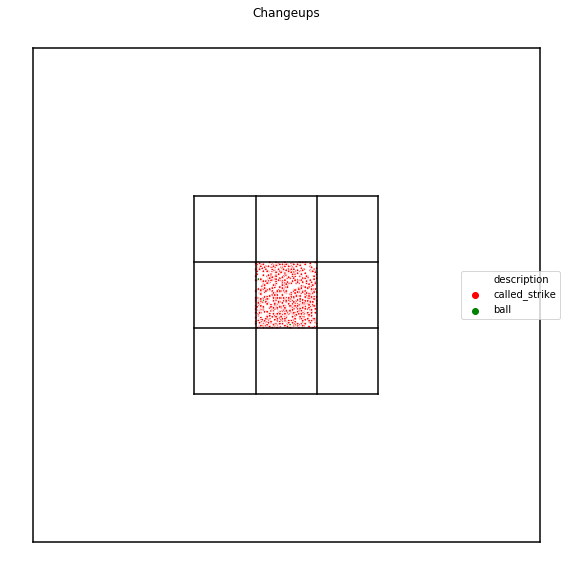

In [124]:
fig, ax = plt.subplots(figsize =(10,10))

plt.plot([-2,-2],[0,5], color="black")
plt.plot([2,2],[0,5], color="black")
plt.plot([-2,2],[0,0], color="black")
plt.plot([-2,2],[5,5], color="black")

plt.plot([-.725,-.725],[1.5,3.5], color="black")
plt.plot([.725,.725],[1.5,3.5], color="black")
plt.plot([-.725,.725],[1.5,1.5], color="black")
plt.plot([-.725,.725],[3.5,3.5], color="black")

plt.plot([-.241667,-.241667],[1.5,3.5], color="black")
plt.plot([.241667,.241667],[1.5,3.5], color="black")
plt.plot([-.725,.725],[2.166,2.166], color="black")
plt.plot([-.725,.725],[2.833,2.833], color="black")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])


palette ={"ball": "green", "called_strike": "red"}

ax = sns.scatterplot(data=grab_pitches_from_zone(changeups, area_5_bounds), x='plate_x', y='plate_z', hue = 'description', s = 7, palette = palette)
ax.set_title('Changeups')
plt.show()


In [516]:
pitches = list(data['pitch_name'].unique())[:7]
pitches_dict = {}
for pitch in pitches:
    pitch_pct_list = []
    pitch_df = pitch_data[pitch_data['pitch_name'] == pitch]
    for zone in zones:
        pitch_pct_list.append(pct_correct_per_zone(pitch_df, zone))
    pitches_dict[pitch] = pitch_pct_list
pitches_dict

{'Changeup': [83.46456692913385,
  91.44295302013423,
  85.375,
  94.35114503816794,
  99.31506849315068,
  99.0152193375112,
  61.70583115752829,
  74.62482946793997,
  72.05623901581723],
 '4-Seam Fastball': [75.7046568627451,
  87.38926524231371,
  79.40795559666975,
  95.29866000454236,
  99.59301339664236,
  98.03158887317304,
  69.6943972835314,
  80.57813911472448,
  81.14520360442569],
 '2-Seam Fastball': [80.042689434365,
  86.65358194308145,
  80.21472392638037,
  96.31236442516268,
  99.63503649635037,
  98.01587301587301,
  69.3853427895981,
  76.83823529411765,
  76.90639681966029],
 'Cutter': [76.02459016393442,
  89.40972222222221,
  80.028129395218,
  97.58812615955473,
  99.70238095238095,
  98.2419855222337,
  70.61143984220908,
  79.56834532374101,
  81.8001978239367],
 'Curveball': [80.66465256797582,
  88.59375,
  84.54545454545455,
  97.41985926505082,
  99.8398291510945,
  99.04030710172745,
  67.07717569786536,
  79.63746223564955,
  76.59574468085107],
 'Slider

In [ ]:
pitch_pct_list = []
for zone in zones:
    pitch_pct_list.append(pct_correct_per_zone(pitch_df, zone))


In [518]:
def inside_zone_list(data):
    inside_zone_list = []
    for zone in zones:
           inside_zone_list.append(pct_correct_per_zone(data, zone))
    return inside_zone_list

In [517]:
def outside_zone_list(data):
    outside_zone_list = []
    for zone in range(len(outside_zones)):
        try:
             outside_zone_list.append(pct_correct_per_zone_outside(data, outside_zones[zone][0], outside_zones[zone][1]))
        except:
            pass
    return  outside_zone_list

In [464]:
pct_correct_per_zone_outside(pitch_data, outside_zones[0][0], outside_zones[0][1])

28.914972802748355

In [507]:
outside_pitches_dict = {}
for pitch in pitches:
    pitch_pct_list = []
    pitch_df = pitch_data[pitch_data['pitch_name'] == pitch]
    for zone in range(len(outside_zones)):
        try:
            pitch_pct_list.append(pct_correct_per_zone_outside(pitch_df, outside_zones[zone][0], outside_zones[zone][1]))
        except:
            pass
    outside_pitches_dict[pitch] = pitch_pct_list

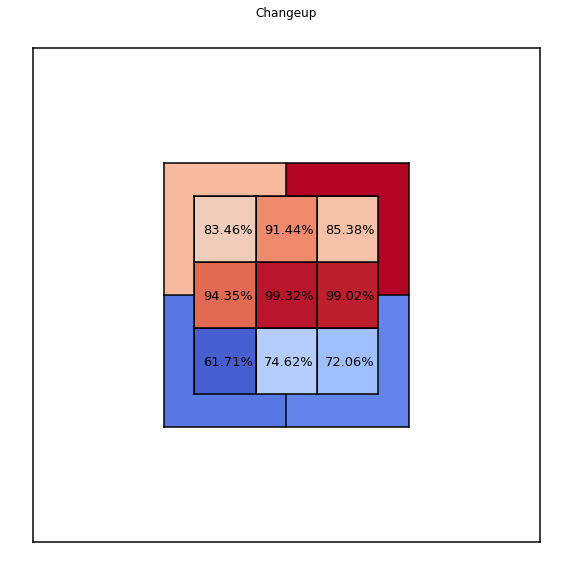

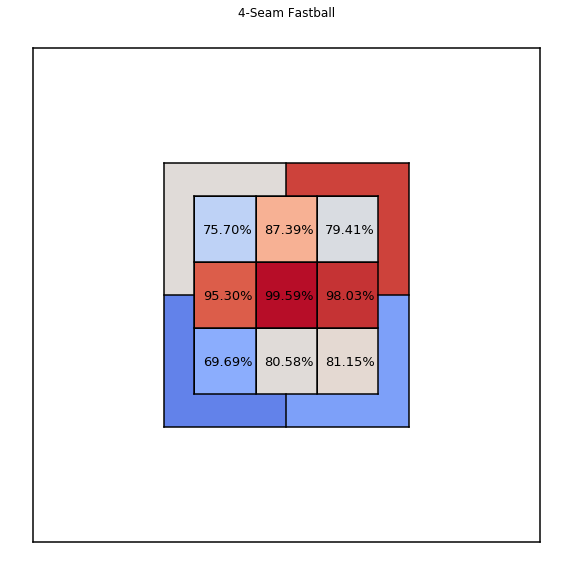

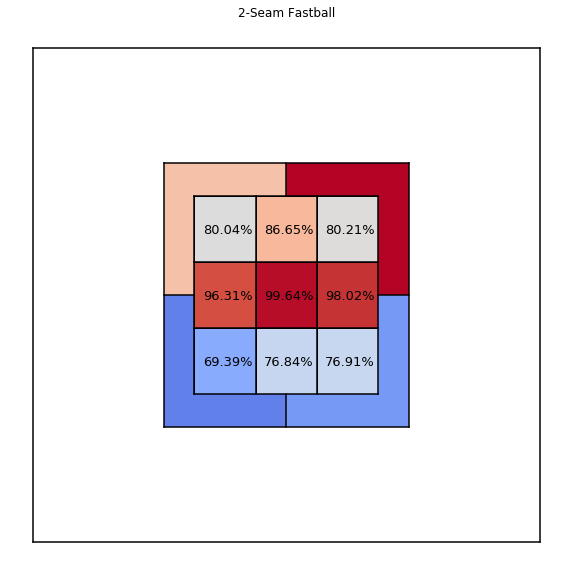

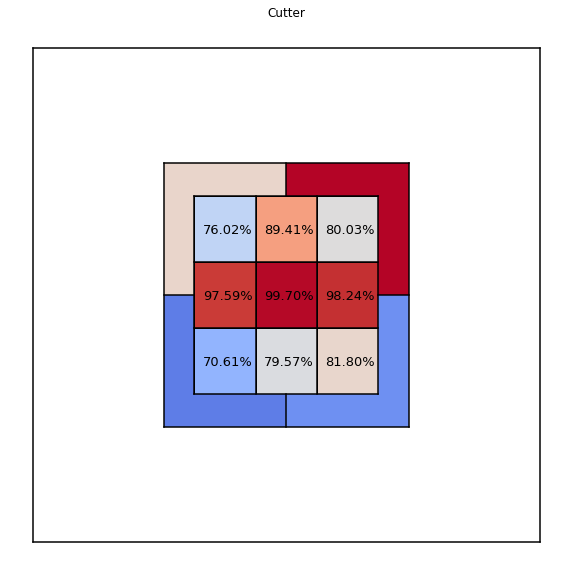

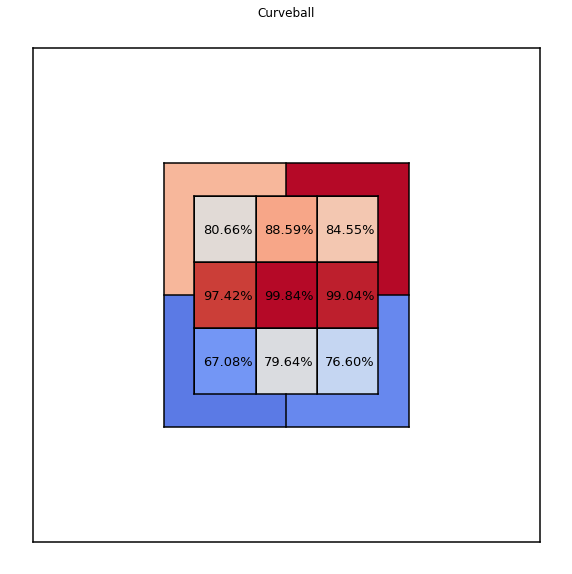

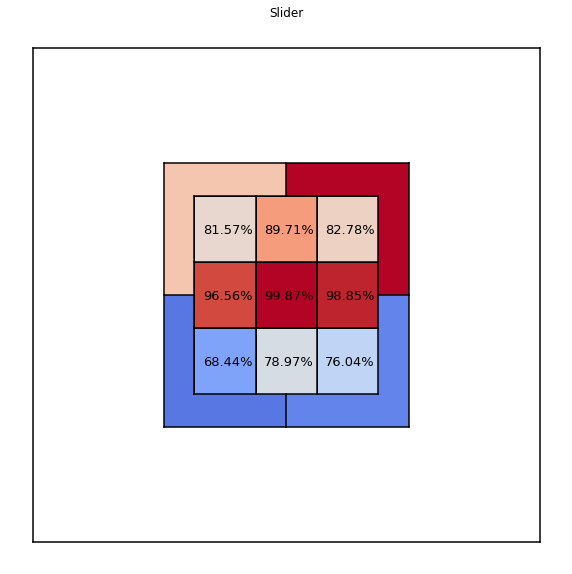

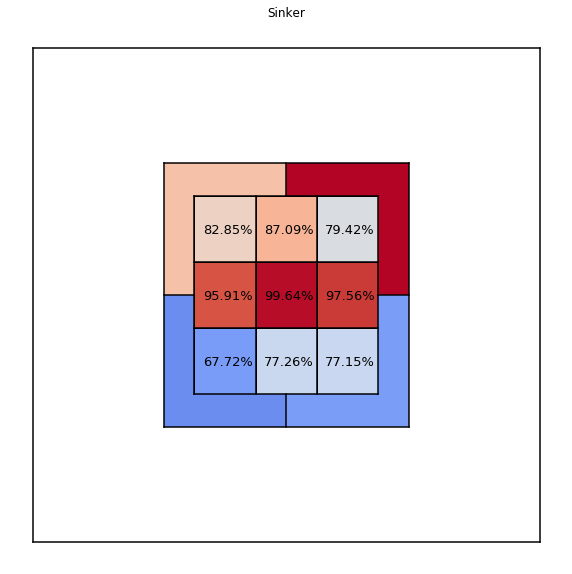

In [499]:
cmap = plt.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=60, vmax=100)
rectangles = [(-.725,2.833), (-.241667,2.833), (.241667, 2.833), (-.725,2.166), (-.241667,2.166), (.241667, 2.166), (-.725,1.5), (-.241667,1.5), (.241667, 1.5)]
out_norm = mcolors.Normalize(vmin=0, vmax=50)
outside_rectangles = [[(-.9666,2.5), .24166, 1.333, (-.725, 3.5), .725, .333], [(.9666,2.5), -.24166, 1.333, (.725, 3.5), -.725, .333], [(-.9666,2.5), .24166, -1.333, (-.725, 1.5), .725, -.333], [(.9666,2.5), -.24166, -1.333, (.725, 1.5), -.725, -.333]]



for pitch in pitches:
    fig, ax = plt.subplots(figsize =(10,10))
    #Plot outside rectuange
    plt.plot([-2,-2],[0,5], color="black")
    plt.plot([2,2],[0,5], color="black")
    plt.plot([-2,2],[0,0], color="black")
    plt.plot([-2,2],[5,5], color="black")
    #Plot Strikezone
    plt.plot([-.725,-.725],[1.5,3.5], color="black")
    plt.plot([.725,.725],[1.5,3.5], color="black")
    plt.plot([-.725,.725],[1.5,1.5], color="black")
    plt.plot([-.725,.725],[3.5,3.5], color="black")
    #Plot strikezone zones
    plt.plot([-.241667,-.241667],[1.5,3.5], color="black")
    plt.plot([.241667,.241667],[1.5,3.5], color="black")
    plt.plot([-.725,.725],[2.166,2.166], color="black")
    plt.plot([-.725,.725],[2.833,2.833], color="black")
    #Plot Outside strikezone zone
    plt.plot([-.9666,-.9666],[1.1666,3.833], color="black")
    plt.plot([.9666,.9666],[1.1666,3.833], color="black")
    plt.plot([-.9666,.9666],[1.166,1.166], color="black")
    plt.plot([-.9666,.9666],[3.833,3.833], color="black")
    #Plot outside  zones
    plt.plot([0,0],[3.5,3.833], color="black")
    plt.plot([0,0],[1.16666,1.5], color="black")
    plt.plot([-.9666,-.725],[2.5,2.5], color="black")
    plt.plot([.725,.9666],[2.5,2.5], color="black")


    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

        
    for i, value in enumerate(pitches_dict[pitch]):
        rect = patch.Rectangle(rectangles[i], .4833, .6666, linewidth=1, edgecolor='black', facecolor=cmap(norm(value)))
        ax.add_patch(rect)
        ax.text(centers[i][0], centers[i][1], '{:.2f}%'.format(pitches_dict[pitch][i]), fontsize = 13)
    
    for i, value in enumerate(outside_pitches_dict[pitch]):
        rect1 =  patch.Rectangle(outside_rectangles[i][0], outside_rectangles[i][1], outside_rectangles[i][2], linewidth=0, edgecolor='black', facecolor=cmap(out_norm(value)))
        rect2 = patch.Rectangle(outside_rectangles[i][3], outside_rectangles[i][4], outside_rectangles[i][5], linewidth=0, edgecolor='black', facecolor=cmap(out_norm(value)))
        ax.add_patch(rect1)
        ax.add_patch(rect2)
        
    ax.set_title(pitch)
    
    plt.show()
    
#Left side is the batter, pitches' x-values are inverted for lefties to standardize the data

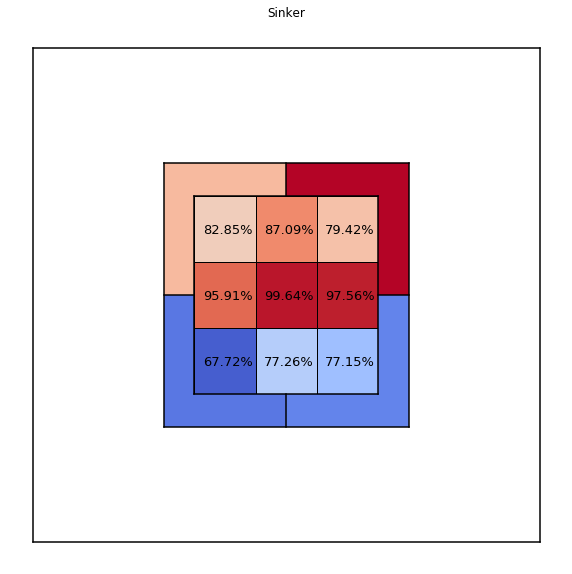

In [520]:
cmap = plt.get_cmap('coolwarm')
out_norm = mcolors.Normalize(vmin=0, vmax=50)
outside_rectangles = [[(-.9666,2.5), .24166, 1.333, (-.725, 3.5), .725, .333], [(.9666,2.5), -.24166, 1.333, (.725, 3.5), -.725, .333], [(-.9666,2.5), .24166, -1.333, (-.725, 1.5), .725, -.333], [(.9666,2.5), -.24166, -1.333, (.725, 1.5), -.725, -.333]]
cmap = plt.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=60, vmax=100)
rectangles = [(-.725,2.833), (-.241667,2.833), (.241667, 2.833), (-.725,2.166), (-.241667,2.166), (.241667, 2.166), (-.725,1.5), (-.241667,1.5), (.241667, 1.5)]

fig, ax = plt.subplots(figsize =(10,10))

plt.plot([-2,-2],[0,5], color="black")
plt.plot([2,2],[0,5], color="black")
plt.plot([-2,2],[0,0], color="black")
plt.plot([-2,2],[5,5], color="black")

plt.plot([-.725,-.725],[1.5,3.5], color="black")
plt.plot([.725,.725],[1.5,3.5], color="black")
plt.plot([-.725,.725],[1.5,1.5], color="black")
plt.plot([-.725,.725],[3.5,3.5], color="black")

plt.plot([-.9666,-.9666],[1.1666,3.833], color="black")
plt.plot([.9666,.9666],[1.1666,3.833], color="black")
plt.plot([-.9666,.9666],[1.166,1.166], color="black")
plt.plot([-.9666,.9666],[3.833,3.833], color="black")

plt.plot([0,0],[3.5,3.833], color="black")
plt.plot([0,0],[1.16666,1.5], color="black")
plt.plot([-.9666,-.725],[2.5,2.5], color="black")
plt.plot([.725,.9666],[2.5,2.5], color="black")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

for i, value in enumerate(inside_zone_list(changeups)): #inside data here
    rect = patch.Rectangle(rectangles[i], .4833, .6666, linewidth=1, edgecolor='black', facecolor=cmap(norm(value)))
    ax.add_patch(rect)
    ax.text(centers[i][0], centers[i][1], '{:.2f}%'.format(pitches_dict[pitch][i]), fontsize = 13)

for i, value in enumerate(outside_zone_list(changeups)): #outside_data_here
    rect1 =  patch.Rectangle(outside_rectangles[i][0], outside_rectangles[i][1], outside_rectangles[i][2], linewidth=0, edgecolor='black', facecolor=cmap(out_norm(value)))
    rect2 = patch.Rectangle(outside_rectangles[i][3], outside_rectangles[i][4], outside_rectangles[i][5], linewidth=0, edgecolor='black', facecolor=cmap(out_norm(value)))
    ax.add_patch(rect1)
    ax.add_patch(rect2)

ax.set_title(pitch)

plt.show()

In [508]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [514]:
classifier_data = pitch_data[['description', 'plate_x', 'plate_z']]

In [515]:
classifier_data

,description,plate_x,plate_z
0,ball,-0.87,-0.33
1,called_strike,-0.26,2.67
2,called_strike,0.55,2.10
3,called_strike,0.70,3.03
4,ball,1.24,3.06
...,...,...,...
39994,ball,-1.10,1.94
39995,ball,2.28,2.90
39996,ball,0.39,1.39
39997,ball,-0.28,-0.11
